# Online Gaming Behavior Dataset - EDA & ML Demo

This notebook demonstrates:
1. **Exploratory Data Analysis (EDA)** - Understanding the dataset
2. **Machine Learning** - Predicting PlayerExpertise and SpendingPropensity using Random Forest

Dataset: 10,000 player-game combinations with realistic patterns for educational purposes.

## Setup

In [267]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Dataset

In [268]:
# Load the dataset
df = pd.read_csv('generated_gaming_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Unique players: {df['PlayerID'].nunique()}")
print(f"\nColumns: {df.columns.tolist()}")

Dataset shape: (10037, 21)
Unique players: 6425

Columns: ['PlayerID', 'Age', 'Gender', 'Location', 'GameID', 'GameName', 'GameGenre', 'GameDifficulty', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel', 'DaysPlayed', 'PurchaseCount', 'TotalSpend', 'AvgPurchasesPerMonth', 'AvgPurchaseValue', 'SpendingPropensity', 'PlayerExpertise']


In [269]:
# Display first few rows
df.head(10)

,PlayerID,Age,Gender,Location,GameID,GameName,GameGenre,GameDifficulty,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,DaysPlayed,PurchaseCount,TotalSpend,AvgPurchasesPerMonth,AvgPurchaseValue,SpendingPropensity,PlayerExpertise
0,1,24.0,Male,USA,ACT_001,Battle Royale Extreme,Action,Medium,50.00,8.0,61.0,10.0,10.0,Medium,17.0,4.0,80.00,7.06,20.00,Occasional,Intermediate
1,1,24.0,Male,USA,RPG_002,Mystic Realms Online,RPG,Medium,150.00,5.0,124.0,13.0,13.0,Medium,47.0,8.0,80.00,5.11,10.00,Occasional,Intermediate
2,1,24.0,Male,USA,ACT_003,Street Fighter Ultimate,Action,Easy,131.66,14.0,53.0,26.0,29.0,Medium,73.0,5.0,10.82,2.05,2.16,Occasional,Beginner
3,2,27.0,Male,Asia,STR_001,Empire Builder,Strategy,Easy,398.34,3.0,168.0,44.0,9.0,Medium,329.0,6.0,80.00,0.55,13.33,Occasional,Beginner
4,3,27.0,Male,Europe,ACT_001,Battle Royale Extreme,Action,Hard,119.72,4.0,50.0,30.0,12.0,Low,232.0,0.0,0.00,0.00,0.00,NonSpender,Intermediate
5,4,26.0,Other,Europe,ACT_001,Battle Royale Extreme,Action,Easy,79.88,6.0,51.0,15.0,15.0,Medium,96.0,1.0,5.33,0.31,5.33,Occasional,Beginner
6,5,24.0,Male,USA,ACT_002,Zombie Apocalypse,Action,Medium,240.00,11.0,63.0,50.0,27.0,High,150.0,7.0,80.00,1.40,11.43,Occasional,Intermediate
7,6,37.0,Male,USA,ACT_002,Zombie Apocalypse,Action,Medium,233.76,6.0,83.0,50.0,51.0,Medium,202.0,0.0,0.00,0.00,0.00,NonSpender,Intermediate
8,7,26.0,Male,USA,RPG_001,Dragon's Quest,RPG,Easy,100.00,3.0,125.0,16.0,4.0,Medium,17.0,3.0,57.28,5.29,19.09,Occasional,Beginner
9,8,48.0,Male,Asia,ACT_003,Street Fighter Ultimate,Action,Easy,25.00,4.0,69.0,1.0,1.0,Low,29.0,0.0,0.00,0.00,0.00,NonSpender,Beginner


In [270]:
# Data types and missing values
print("\n=== Data Info ===")
df.info()

print("\n=== Missing Values ===")
print(df.isnull().sum())

display(df.head(10))


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   10037 non-null  int64  
 1   Age                        10034 non-null  float64
 2   Gender                     10034 non-null  object 
 3   Location                   10036 non-null  object 
 4   GameID                     10037 non-null  object 
 5   GameName                   10037 non-null  object 
 6   GameGenre                  10036 non-null  object 
 7   GameDifficulty             10031 non-null  object 
 8   PlayTimeHours              10036 non-null  float64
 9   SessionsPerWeek            10034 non-null  float64
 10  AvgSessionDurationMinutes  9232 non-null   float64
 11  PlayerLevel                10032 non-null  float64
 12  AchievementsUnlocked       9431 non-null   float64
 13  EngagementLevel            

,PlayerID,Age,Gender,Location,GameID,GameName,GameGenre,GameDifficulty,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,DaysPlayed,PurchaseCount,TotalSpend,AvgPurchasesPerMonth,AvgPurchaseValue,SpendingPropensity,PlayerExpertise
0,1,24.0,Male,USA,ACT_001,Battle Royale Extreme,Action,Medium,50.00,8.0,61.0,10.0,10.0,Medium,17.0,4.0,80.00,7.06,20.00,Occasional,Intermediate
1,1,24.0,Male,USA,RPG_002,Mystic Realms Online,RPG,Medium,150.00,5.0,124.0,13.0,13.0,Medium,47.0,8.0,80.00,5.11,10.00,Occasional,Intermediate
2,1,24.0,Male,USA,ACT_003,Street Fighter Ultimate,Action,Easy,131.66,14.0,53.0,26.0,29.0,Medium,73.0,5.0,10.82,2.05,2.16,Occasional,Beginner
3,2,27.0,Male,Asia,STR_001,Empire Builder,Strategy,Easy,398.34,3.0,168.0,44.0,9.0,Medium,329.0,6.0,80.00,0.55,13.33,Occasional,Beginner
4,3,27.0,Male,Europe,ACT_001,Battle Royale Extreme,Action,Hard,119.72,4.0,50.0,30.0,12.0,Low,232.0,0.0,0.00,0.00,0.00,NonSpender,Intermediate
5,4,26.0,Other,Europe,ACT_001,Battle Royale Extreme,Action,Easy,79.88,6.0,51.0,15.0,15.0,Medium,96.0,1.0,5.33,0.31,5.33,Occasional,Beginner
6,5,24.0,Male,USA,ACT_002,Zombie Apocalypse,Action,Medium,240.00,11.0,63.0,50.0,27.0,High,150.0,7.0,80.00,1.40,11.43,Occasional,Intermediate
7,6,37.0,Male,USA,ACT_002,Zombie Apocalypse,Action,Medium,233.76,6.0,83.0,50.0,51.0,Medium,202.0,0.0,0.00,0.00,0.00,NonSpender,Intermediate
8,7,26.0,Male,USA,RPG_001,Dragon's Quest,RPG,Easy,100.00,3.0,125.0,16.0,4.0,Medium,17.0,3.0,57.28,5.29,19.09,Occasional,Beginner
9,8,48.0,Male,Asia,ACT_003,Street Fighter Ultimate,Action,Easy,25.00,4.0,69.0,1.0,1.0,Low,29.0,0.0,0.00,0.00,0.00,NonSpender,Beginner


## 1.5 Data Quality Assessment

**IMPORTANT**: This dataset intentionally contains data quality issues for teaching purposes:
- Duplicate rows (~0.37%)
- Age anomalies - typo-style errors (~0.73%, capped at age 199)
- Missing values (both feature-level and row-level)

Let's identify and assess these issues before cleaning.

In [271]:
# 1. Check for duplicate rows
print("=== DUPLICATE ROWS ===")
n_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {n_duplicates}")

if n_duplicates > 0:
    duplicate_rows = df[df.duplicated(keep=False)].sort_values('PlayerID')
    print(f"Total rows involved in duplicates: {len(duplicate_rows)}")
    print(f"\nSample duplicate (first 2 occurrences):")
    # Show first duplicate example
    first_dup_id = duplicate_rows['PlayerID'].iloc[0]
    display(duplicate_rows[duplicate_rows['PlayerID'] == first_dup_id].head(2))

=== DUPLICATE ROWS ===
Number of duplicate rows: 24
Total rows involved in duplicates: 48

Sample duplicate (first 2 occurrences):


,PlayerID,Age,Gender,Location,GameID,GameName,GameGenre,GameDifficulty,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,DaysPlayed,PurchaseCount,TotalSpend,AvgPurchasesPerMonth,AvgPurchaseValue,SpendingPropensity,PlayerExpertise
320,212,21.0,Male,Europe,ACT_003,Street Fighter Ultimate,Action,Easy,363.42,7.0,67.0,60.0,78.0,Medium,278.0,0.0,0.0,0.0,0.0,NonSpender,Intermediate
321,212,21.0,Male,Europe,ACT_003,Street Fighter Ultimate,Action,Easy,363.42,7.0,67.0,60.0,78.0,Medium,278.0,0.0,0.0,0.0,0.0,NonSpender,Intermediate


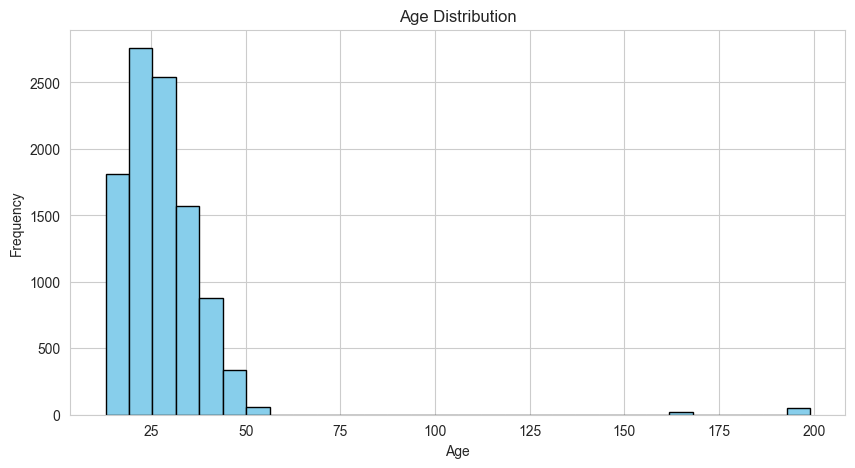

In [272]:
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


=== AGE ANOMALIES ===
Ages outside normal range (13-65): 73
Sample anomalous ages: [166.0, 199.0]
Age range: 166 - 199
These likely represent typo errors (e.g., 166 instead of 16)


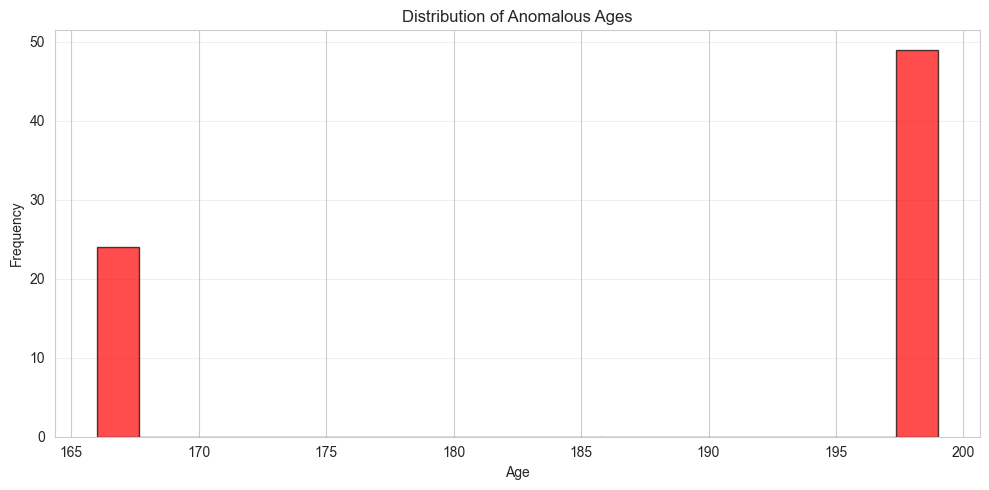

In [273]:
# 2. Check for Age anomalies (typo-style errors)
print("\n=== AGE ANOMALIES ===")
age_anomalies = df[(df['Age'] > 100) | (df['Age'] < 13)]
print(f"Ages outside normal range (13-65): {len(age_anomalies)}")

if len(age_anomalies) > 0:
    print(f"Sample anomalous ages: {sorted(age_anomalies['Age'].dropna().unique())[:10]}")
    print(f"Age range: {age_anomalies['Age'].min():.0f} - {age_anomalies['Age'].max():.0f}")
    print(f"These likely represent typo errors (e.g., 166 instead of 16)")
    
    # Show distribution of anomalous ages
    plt.figure(figsize=(10, 5))
    plt.hist(age_anomalies['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='red')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Distribution of Anomalous Ages')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


=== MISSING VALUES ANALYSIS ===
Total missing values: 1449
Percentage of dataset: 0.69%

Columns with missing values:
  AvgSessionDurationMinutes: 805 (8.0%)
  AchievementsUnlocked: 606 (6.0%)
  GameDifficulty: 6 (0.1%)
  PlayerLevel: 5 (0.0%)
  AvgPurchaseValue: 4 (0.0%)
  Age: 3 (0.0%)
  Gender: 3 (0.0%)
  SessionsPerWeek: 3 (0.0%)
  EngagementLevel: 3 (0.0%)
  PurchaseCount: 3 (0.0%)
  TotalSpend: 2 (0.0%)
  AvgPurchasesPerMonth: 2 (0.0%)
  Location: 1 (0.0%)
  GameGenre: 1 (0.0%)
  PlayTimeHours: 1 (0.0%)
  DaysPlayed: 1 (0.0%)


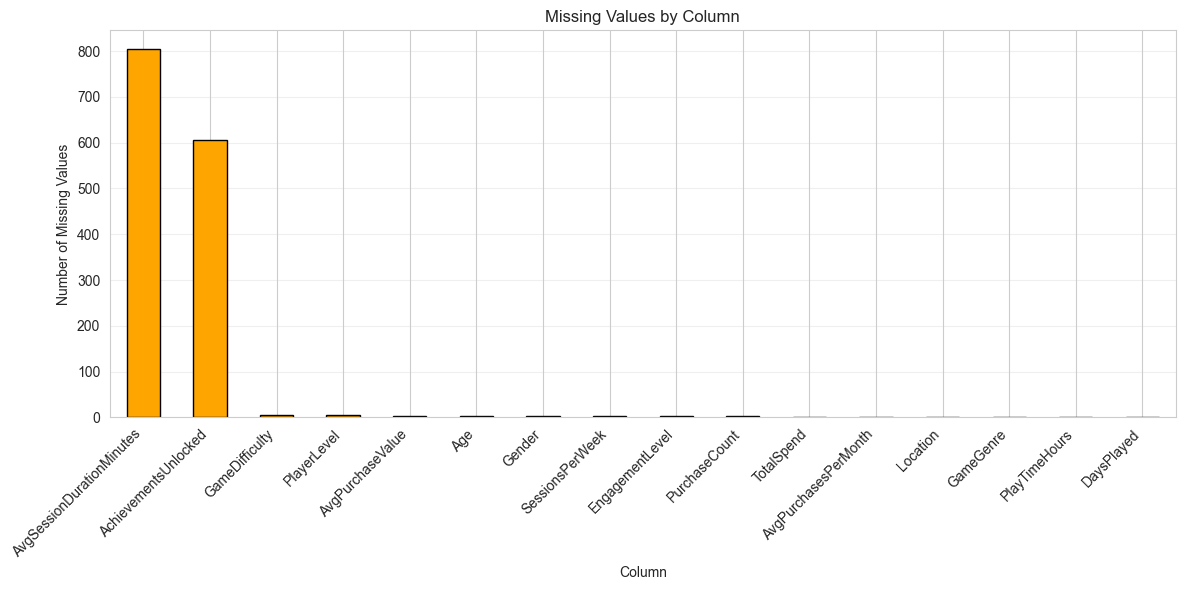


=== INCOMPLETE RECORDS ===
Rows with 4+ missing values: 10

Sample incomplete record (first one):
Row 987:
SessionsPerWeek              NaN
AvgSessionDurationMinutes    NaN
AchievementsUnlocked         NaN
PurchaseCount                NaN
AvgPurchaseValue             NaN
Name: 987, dtype: object


In [274]:
# 3. Missing values analysis
print("\n=== MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum()
total_missing = missing.sum()
print(f"Total missing values: {total_missing}")
print(f"Percentage of dataset: {(total_missing / (len(df) * len(df.columns))) * 100:.2f}%")

# Feature-level missing
print(f"\nColumns with missing values:")
missing_cols = missing[missing > 0].sort_values(ascending=False)
for col in missing_cols.index:
    pct = (missing_cols[col] / len(df)) * 100
    print(f"  {col}: {missing_cols[col]} ({pct:.1f}%)")

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_cols.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Row-level missing - identify incomplete records
print(f"\n=== INCOMPLETE RECORDS ===")
rows_missing = df.isnull().sum(axis=1)
rows_with_many_missing = df[rows_missing >= 4]
print(f"Rows with 4+ missing values: {len(rows_with_many_missing)}")

if len(rows_with_many_missing) > 0:
    print(f"\nSample incomplete record (first one):")
    sample_idx = rows_with_many_missing.index[0]
    print(f"Row {sample_idx}:")
    print(df.iloc[sample_idx][df.iloc[sample_idx].isnull()])

### Data Cleaning

Based on the data quality assessment above, we'll:

1. **Duplicates**: Remove duplicate rows (keep first occurrence)
2. **Age Anomalies**: Fix typo errors by removing the doubled digit (e.g., 166 → 16, 255 → 25)
3. **Missing Values**: 
   - Drop rows with 4+ missing values (incomplete records)
   - Impute remaining missing values (median for numerical, mode for categorical)
   - Note: Target variables have NO missing values

Let's create a cleaned version of the dataset:

In [275]:
# Create cleaned dataset
df_clean = df.copy()

print("=== DATA CLEANING PROCESS ===\n")

# 1. Remove duplicates
n_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
n_removed = n_before - len(df_clean)
print(f"1. Removed {n_removed} duplicate rows")

# 2. Fix age anomalies (typo corrections)
# For ages > 100, assume doubled last digit (e.g., 166 → 16, 255 → 25)
def fix_age_typo(age):
    if pd.isna(age):
        return age
    if age > 100:
        # Remove the doubled digit: 166 → 16, 255 → 25
        age_str = str(int(age))
        if len(age_str) == 3 and age_str[1] == age_str[2]:
            # Doubled last digit pattern (e.g., 166, 255, 344)
            return int(age_str[:2])
        else:
            # Other anomaly - use first 2 digits
            return int(age_str[:2])
    return age

n_age_fixed = (df_clean['Age'] > 100).sum()
df_clean['Age'] = df_clean['Age'].apply(fix_age_typo)
print(f"2. Fixed {n_age_fixed} age anomalies")

# 3. Handle missing values
print(f"\n3. Missing value handling:")
print(f"   Before: {df_clean.isnull().sum().sum()} missing values")

# Drop rows with many missing values (4+)
rows_before = len(df_clean)
df_clean = df_clean[df_clean.isnull().sum(axis=1) < 4]
rows_dropped = rows_before - len(df_clean)
print(f"   - Dropped {rows_dropped} incomplete rows (with 4+ missing values)")

# For remaining missing values, use simple imputation
# Numerical: median imputation
numerical_cols_with_missing = df_clean.select_dtypes(include=[np.number]).columns[df_clean.select_dtypes(include=[np.number]).isnull().any()]
for col in numerical_cols_with_missing:
    median_val = df_clean[col].median()
    n_imputed = df_clean[col].isnull().sum()
    df_clean[col].fillna(median_val, inplace=True)
    print(f"   - Imputed {n_imputed} missing values in {col} (median={median_val:.1f})")

# Categorical: mode imputation
categorical_cols_with_missing = df_clean.select_dtypes(include=['object']).columns[df_clean.select_dtypes(include=['object']).isnull().any()]
for col in categorical_cols_with_missing:
    mode_val = df_clean[col].mode()[0]
    n_imputed = df_clean[col].isnull().sum()
    df_clean[col].fillna(mode_val, inplace=True)
    print(f"   - Imputed {n_imputed} missing values in {col} (mode={mode_val})")

print(f"\n   After: {df_clean.isnull().sum().sum()} missing values")

print(f"\n=== CLEANING SUMMARY ===")
print(f"Original dataset: {len(df)} rows")
print(f"Cleaned dataset: {len(df_clean)} rows")
print(f"Rows removed: {len(df) - len(df_clean)} ({((len(df) - len(df_clean)) / len(df)) * 100:.2f}%)")
print(f"\n✓ Dataset is now clean and ready for analysis!")

# Use cleaned dataset for all subsequent analyses
df = df_clean.copy()
print(f"\n✓ Switched to cleaned dataset ({len(df)} rows)")

=== DATA CLEANING PROCESS ===

1. Removed 24 duplicate rows
2. Fixed 73 age anomalies

3. Missing value handling:
   Before: 1449 missing values
   - Dropped 10 incomplete rows (with 4+ missing values)
   - Imputed 800 missing values in AvgSessionDurationMinutes (median=99.0)
   - Imputed 602 missing values in AchievementsUnlocked (median=16.0)

   After: 0 missing values

=== CLEANING SUMMARY ===
Original dataset: 10037 rows
Cleaned dataset: 10003 rows
Rows removed: 34 (0.34%)

✓ Dataset is now clean and ready for analysis!

✓ Switched to cleaned dataset (10003 rows)


## 2. Exploratory Data Analysis (EDA)

### 2.1 Descriptive Statistics

In [276]:
# Numerical features summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,10003.0,3240.097671,1872.673458,1.0,1622.500,3236.00,4848.500,6500.00
Age,10003.0,27.331800,8.220855,13.0,21.000,26.00,33.000,56.00
PlayTimeHours,10003.0,195.756767,210.119293,15.0,68.345,150.00,240.000,2400.00
SessionsPerWeek,10003.0,6.445366,3.352766,2.0,4.000,6.00,8.000,18.00
AvgSessionDurationMinutes,10003.0,104.929721,48.296835,30.0,68.000,99.00,134.000,240.00
PlayerLevel,10003.0,30.869939,24.818912,1.0,11.000,22.00,50.000,100.00
AchievementsUnlocked,10003.0,22.863241,21.653164,0.0,8.000,16.00,31.000,146.00
DaysPlayed,10003.0,145.061881,165.895181,7.0,46.000,91.00,177.000,1095.00
PurchaseCount,10003.0,3.237429,4.555147,0.0,0.000,1.00,5.000,41.00
TotalSpend,10003.0,61.346445,211.540558,0.0,0.000,10.36,63.345,5506.67


In [277]:
# Categorical features summary
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 
                    'EngagementLevel', 'PlayerExpertise', 'SpendingPropensity']

for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    print(f"Proportions:\n{df[col].value_counts(normalize=True)}")


Gender Distribution:
Gender
Male      6061
Female    3770
Other      172
Name: count, dtype: int64
Proportions:
Gender
Male      0.605918
Female    0.376887
Other     0.017195
Name: proportion, dtype: float64

Location Distribution:
Location
USA       3990
Europe    3534
Asia      2479
Name: count, dtype: int64
Proportions:
Location
USA       0.398880
Europe    0.353294
Asia      0.247826
Name: proportion, dtype: float64

GameGenre Distribution:
GameGenre
RPG         3872
Action      3661
Strategy    2470
Name: count, dtype: int64
Proportions:
GameGenre
RPG         0.387084
Action      0.365990
Strategy    0.246926
Name: proportion, dtype: float64

GameDifficulty Distribution:
GameDifficulty
Medium    3957
Easy      3589
Hard      2457
Name: count, dtype: int64
Proportions:
GameDifficulty
Medium    0.395581
Easy      0.358792
Hard      0.245626
Name: proportion, dtype: float64

EngagementLevel Distribution:
EngagementLevel
Medium    5982
Low       3042
High       979
Name: count, dtyp

### 2.2 Distribution Visualizations

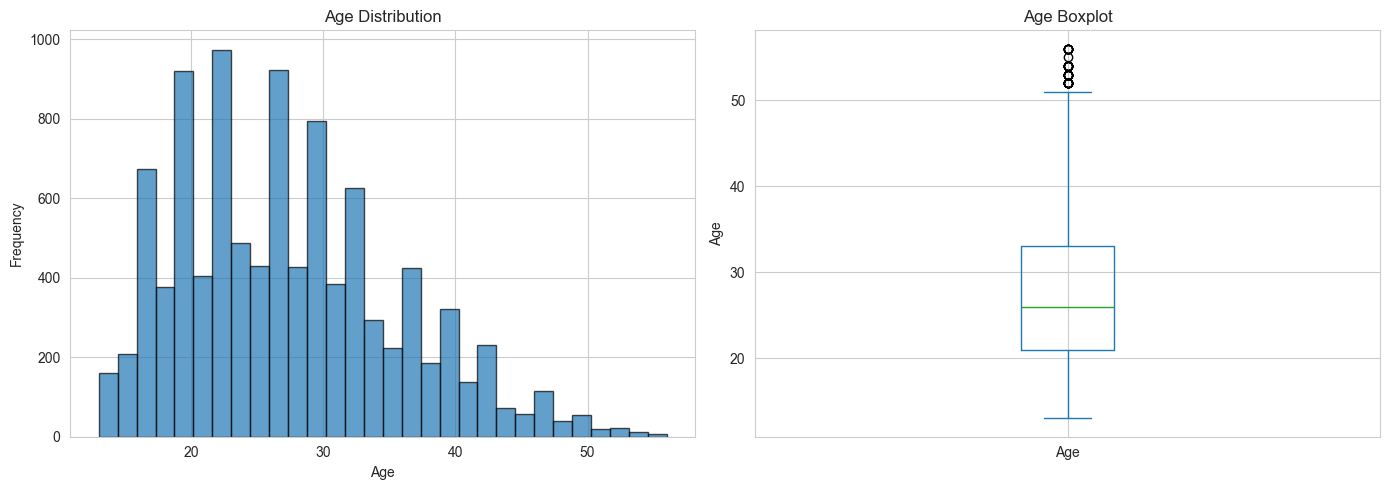

Age: Mean=27.3, Median=26.0, Std=8.2


In [278]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution')

df['Age'].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('Age')
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()

print(f"Age: Mean={df['Age'].mean():.1f}, Median={df['Age'].median():.1f}, Std={df['Age'].std():.1f}")

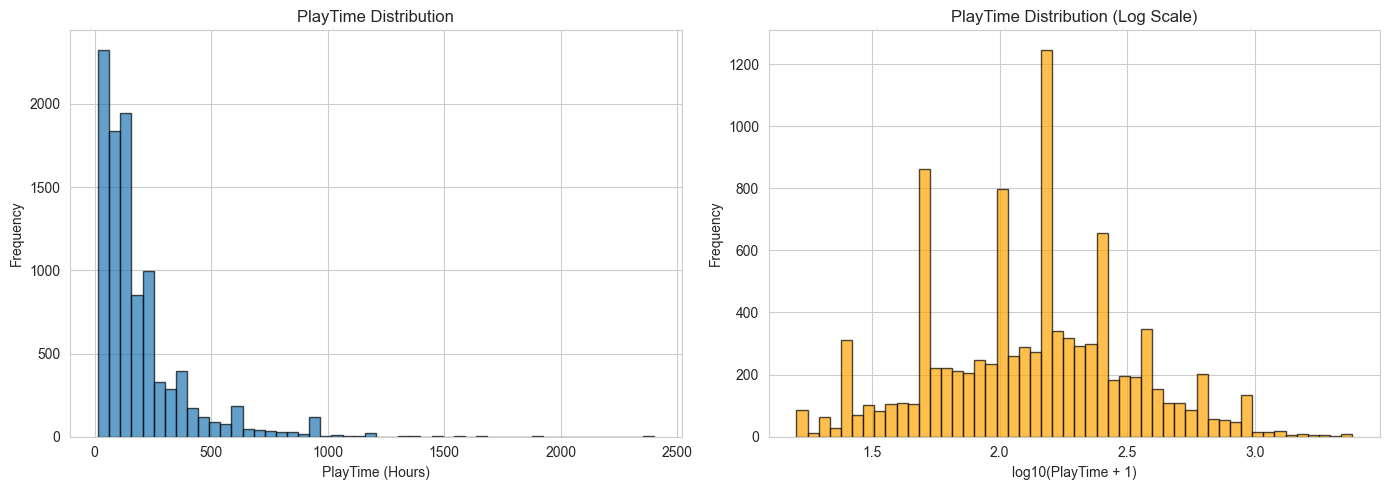

In [279]:
# PlayTimeHours distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['PlayTimeHours'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('PlayTime (Hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('PlayTime Distribution')

# Log scale for better visibility
axes[1].hist(np.log10(df['PlayTimeHours'] + 1), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('log10(PlayTime + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('PlayTime Distribution (Log Scale)')

plt.tight_layout()
plt.show()

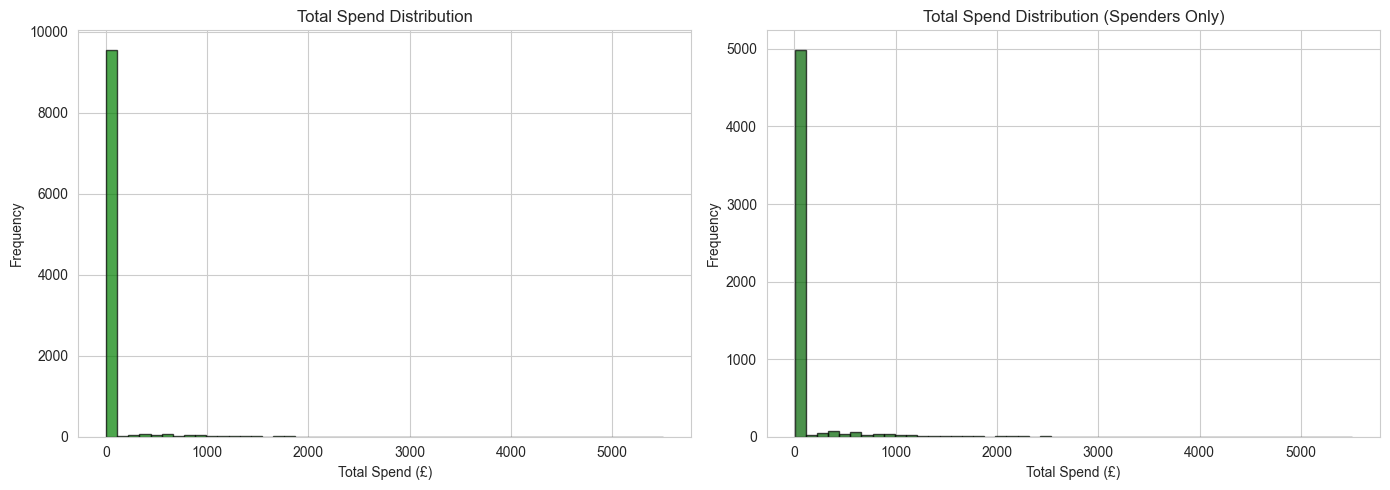

Non-spenders: 4562 (45.6%)
Spenders: Mean=£112.78, Median=£56.16


In [280]:
# Spending distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['TotalSpend'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Total Spend (£)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Total Spend Distribution')

# Focus on non-zero spenders
spenders = df[df['TotalSpend'] > 0]
axes[1].hist(spenders['TotalSpend'], bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
axes[1].set_xlabel('Total Spend (£)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Total Spend Distribution (Spenders Only)')

plt.tight_layout()
plt.show()

print(f"Non-spenders: {(df['TotalSpend'] == 0).sum()} ({(df['TotalSpend'] == 0).mean()*100:.1f}%)")
print(f"Spenders: Mean=£{spenders['TotalSpend'].mean():.2f}, Median=£{spenders['TotalSpend'].median():.2f}")

### 2.3 Categorical Variable Distributions

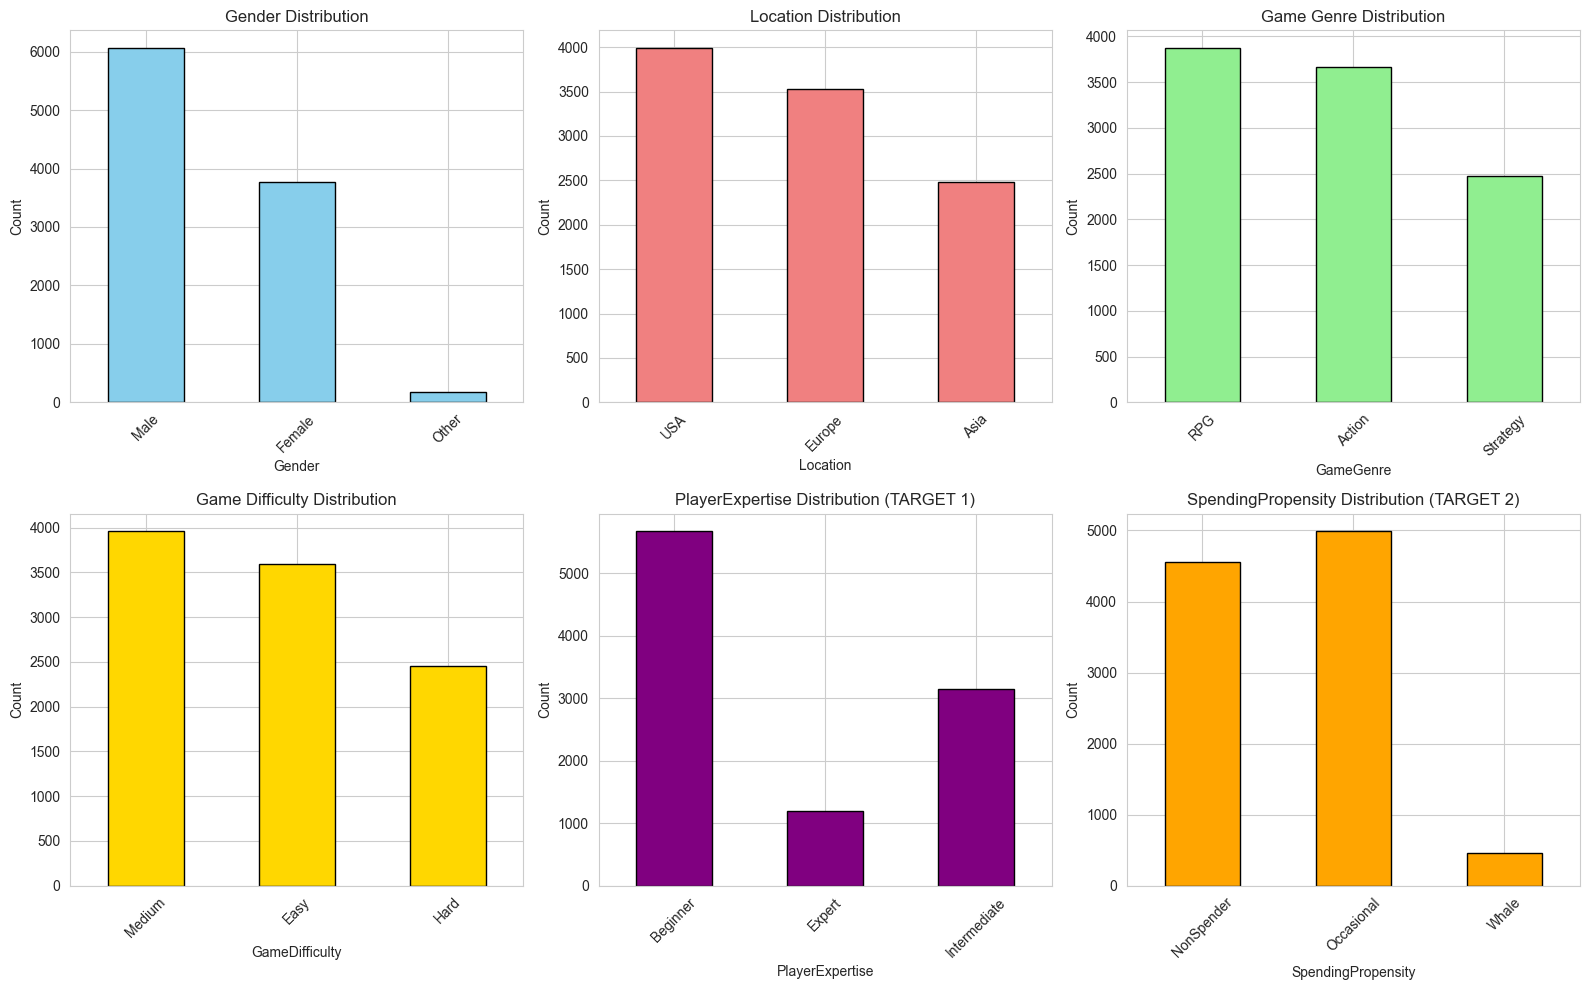

In [281]:
# Demographics visualizations
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Gender
df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Location
df['Location'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Location Distribution')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# GameGenre
df['GameGenre'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Game Genre Distribution')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# GameDifficulty
df['GameDifficulty'].value_counts().plot(kind='bar', ax=axes[1, 0], color='gold', edgecolor='black')
axes[1, 0].set_title('Game Difficulty Distribution')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# PlayerExpertise (TARGET)
df['PlayerExpertise'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('PlayerExpertise Distribution (TARGET 1)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# SpendingPropensity (TARGET)
df['SpendingPropensity'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 2], color='orange', edgecolor='black')
axes[1, 2].set_title('SpendingPropensity Distribution (TARGET 2)')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.4 Correlation Analysis

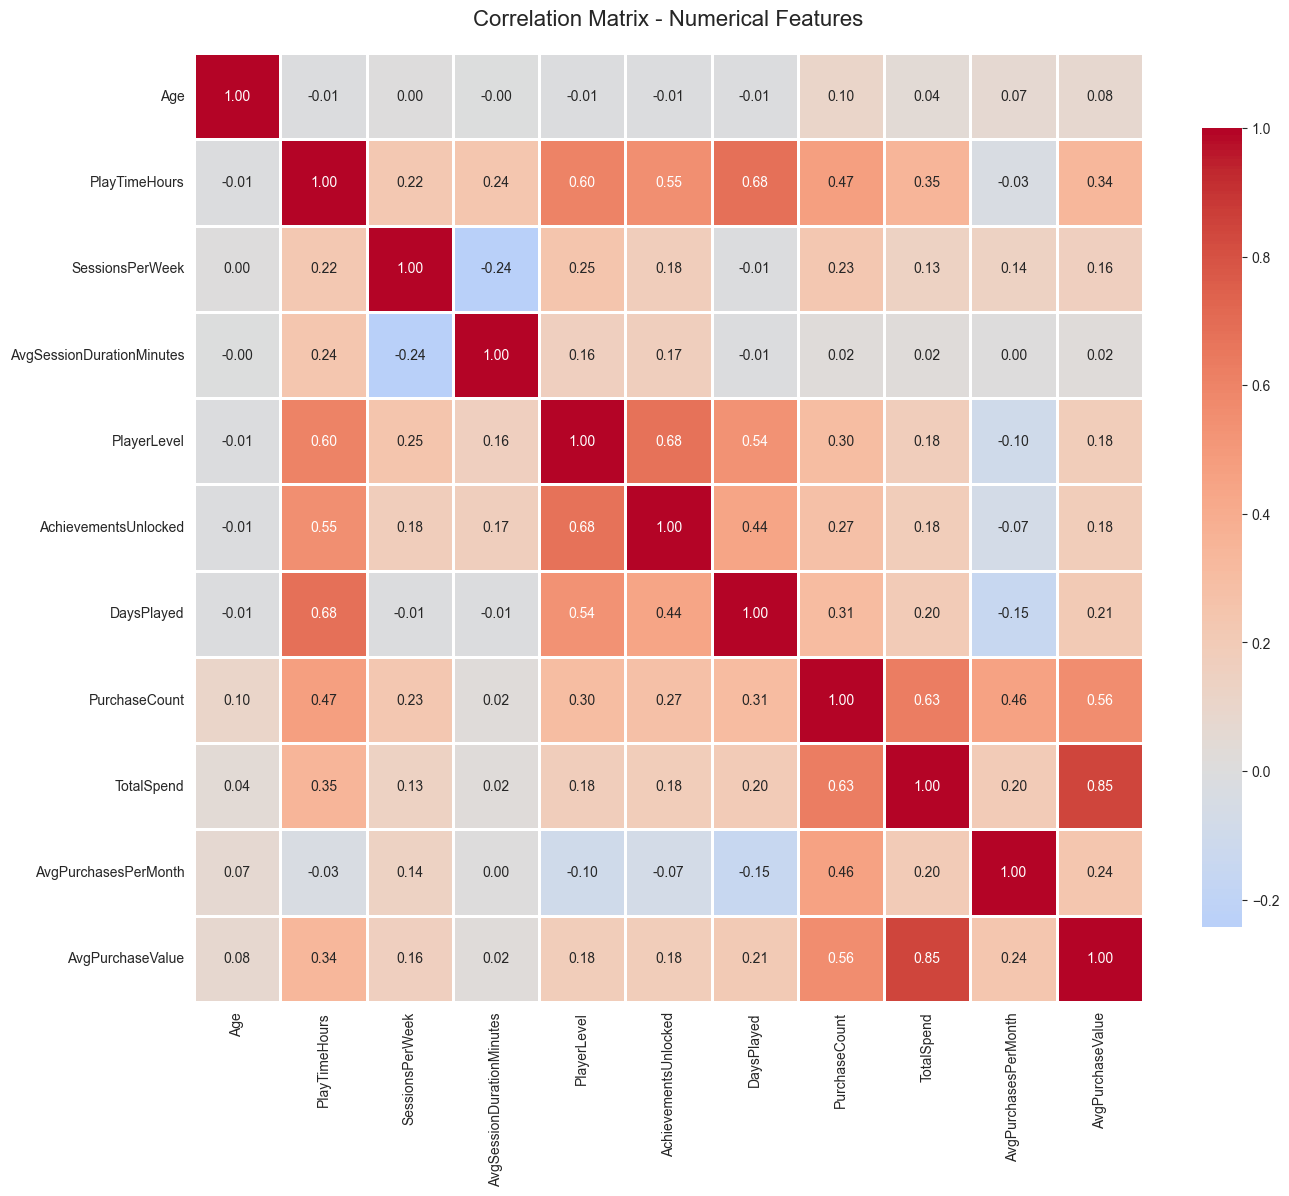


Key Correlations:
PlayTimeHours ↔ PlayerLevel: 0.602
PlayTimeHours ↔ AchievementsUnlocked: 0.552
PurchaseCount ↔ TotalSpend: 0.629
DaysPlayed ↔ PlayTimeHours: 0.680


In [282]:
# Correlation matrix for numerical features
numerical_cols = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
                  'PlayerLevel', 'AchievementsUnlocked', 'DaysPlayed', 
                  'PurchaseCount', 'TotalSpend', 'AvgPurchasesPerMonth', 'AvgPurchaseValue']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nKey Correlations:")
print(f"PlayTimeHours ↔ PlayerLevel: {df['PlayTimeHours'].corr(df['PlayerLevel']):.3f}")
print(f"PlayTimeHours ↔ AchievementsUnlocked: {df['PlayTimeHours'].corr(df['AchievementsUnlocked']):.3f}")
print(f"PurchaseCount ↔ TotalSpend: {df['PurchaseCount'].corr(df['TotalSpend']):.3f}")
print(f"DaysPlayed ↔ PlayTimeHours: {df['DaysPlayed'].corr(df['PlayTimeHours']):.3f}")

### 2.5 Relationship Analysis

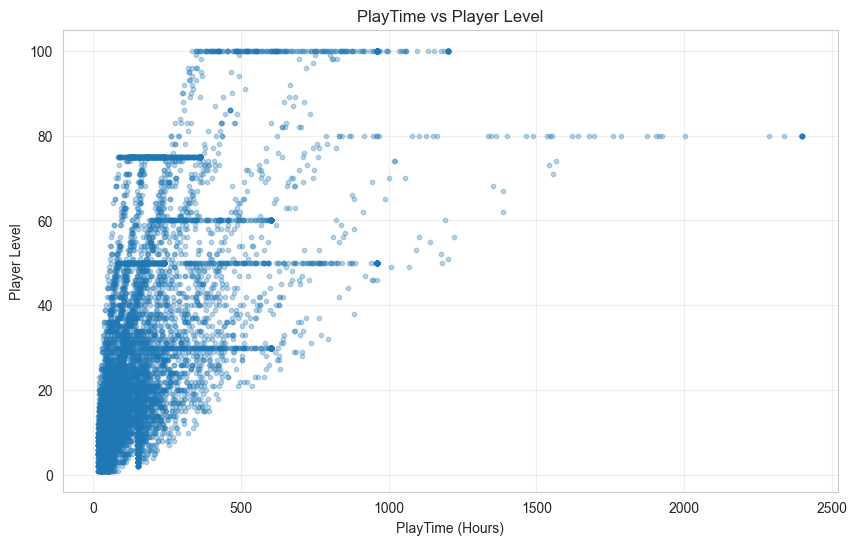

In [283]:
# PlayTimeHours vs PlayerLevel scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PlayTimeHours'], df['PlayerLevel'], alpha=0.3, s=10)
plt.xlabel('PlayTime (Hours)')
plt.ylabel('Player Level')
plt.title('PlayTime vs Player Level')
plt.grid(True, alpha=0.3)
plt.show()

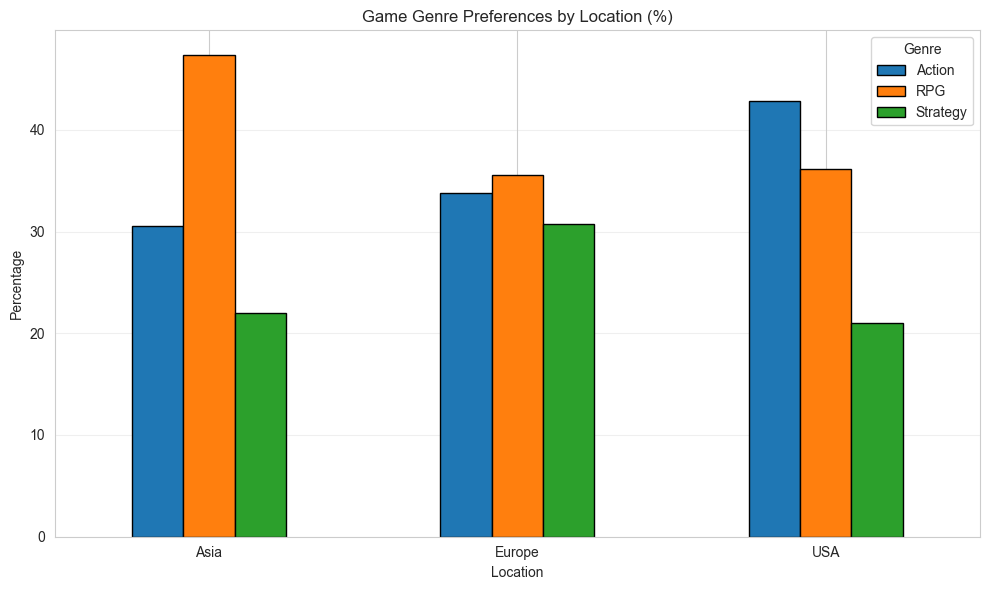


Genre by Location (%):
 GameGenre  Action   RPG  Strategy
Location                         
Asia         30.6  47.4      22.0
Europe       33.8  35.5      30.7
USA          42.9  36.1      21.0


In [284]:
# Genre preferences by Location
genre_location = pd.crosstab(df['Location'], df['GameGenre'], normalize='index') * 100

genre_location.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Game Genre Preferences by Location (%)')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.legend(title='Genre')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGenre by Location (%):\n", genre_location.round(1))

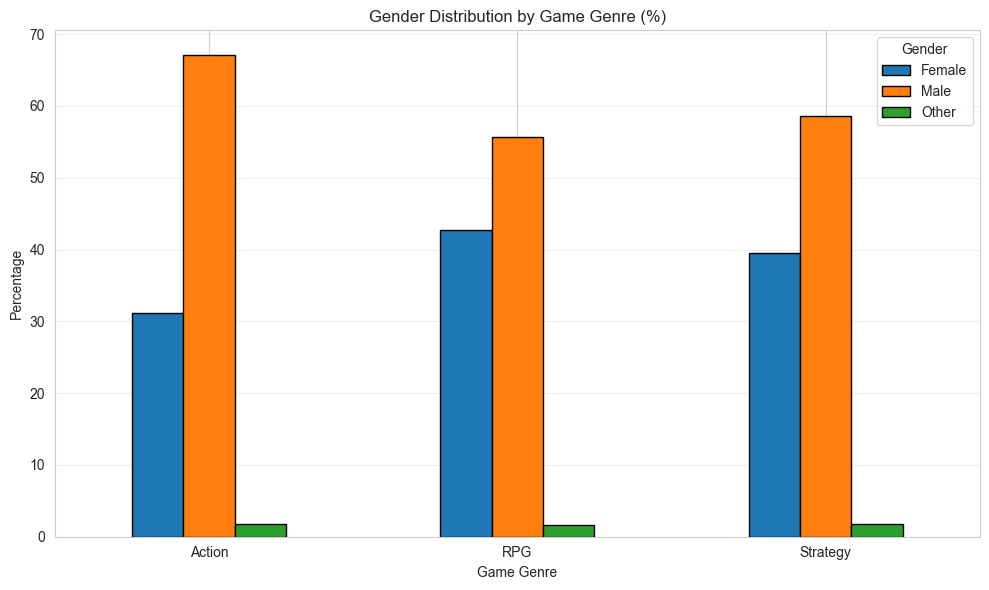


Gender by Genre (%):
 Gender     Female  Male  Other
GameGenre                     
Action       31.1  67.2    1.7
RPG          42.7  55.6    1.7
Strategy     39.6  58.6    1.8


In [285]:
# Gender distribution by Genre
gender_genre = pd.crosstab(df['GameGenre'], df['Gender'], normalize='index') * 100

gender_genre.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Gender Distribution by Game Genre (%)')
plt.xlabel('Game Genre')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGender by Genre (%):\n", gender_genre.round(1))

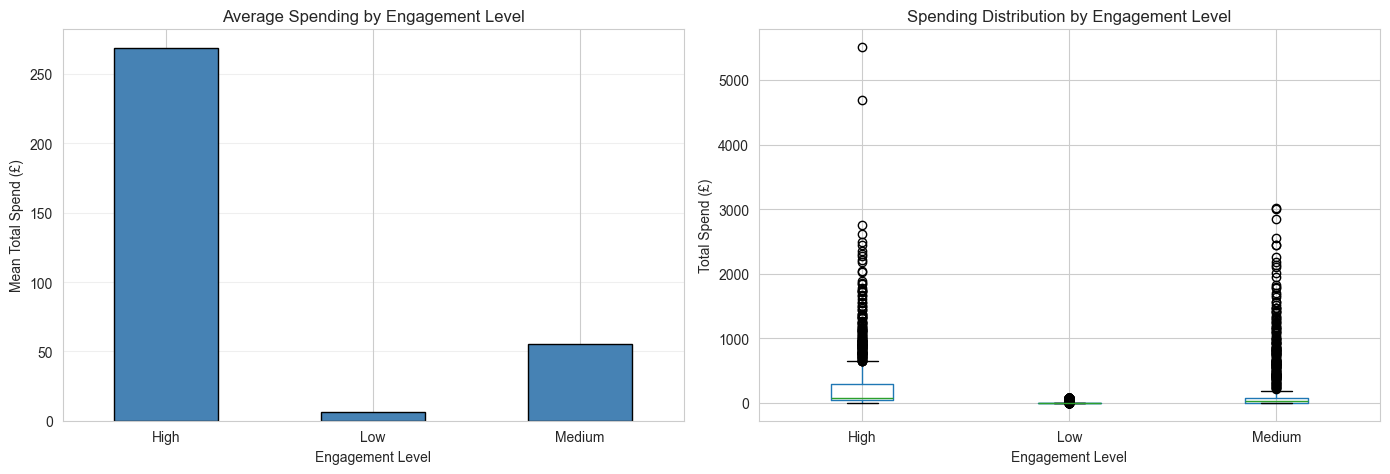


Spending by EngagementLevel:
                        mean  median  count
EngagementLevel                           
High             268.678131   80.00    979
Low                6.430247    0.00   3042
Medium            55.341322   22.55   5982


In [286]:
# Spending by EngagementLevel
engagement_spending = df.groupby('EngagementLevel')['TotalSpend'].agg(['mean', 'median', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

engagement_spending['mean'].plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Average Spending by Engagement Level')
axes[0].set_ylabel('Mean Total Spend (£)')
axes[0].set_xlabel('Engagement Level')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

df.boxplot(column='TotalSpend', by='EngagementLevel', ax=axes[1])
axes[1].set_title('Spending Distribution by Engagement Level')
axes[1].set_ylabel('Total Spend (£)')
axes[1].set_xlabel('Engagement Level')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

print("\nSpending by EngagementLevel:\n", engagement_spending)

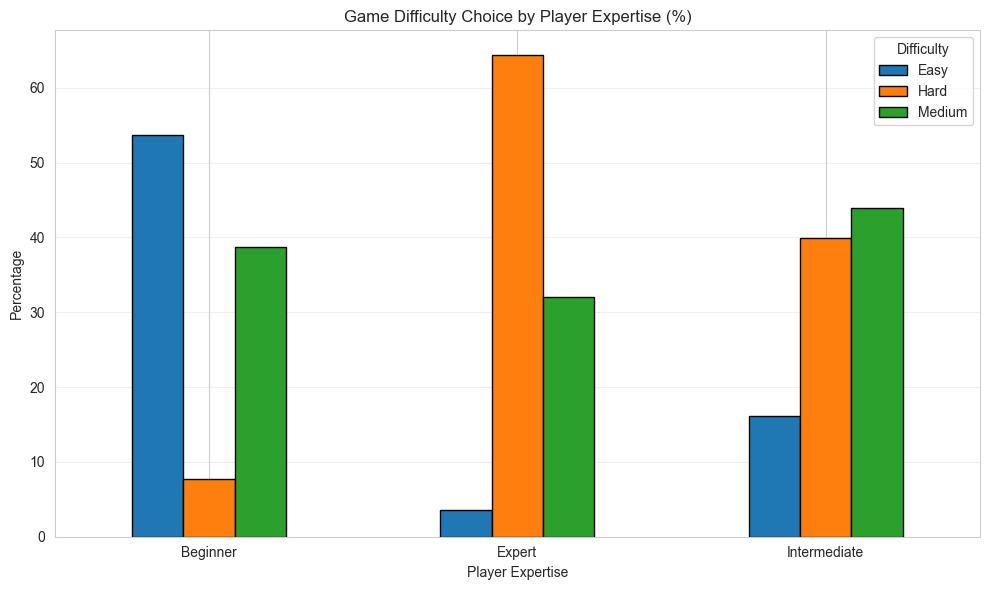


Difficulty by Expertise (%):
 GameDifficulty   Easy  Hard  Medium
PlayerExpertise                    
Beginner         53.6   7.7    38.7
Expert            3.5  64.5    32.0
Intermediate     16.1  39.9    44.0


In [287]:
# PlayerExpertise vs GameDifficulty
expertise_difficulty = pd.crosstab(df['PlayerExpertise'], df['GameDifficulty'], normalize='index') * 100

expertise_difficulty.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Game Difficulty Choice by Player Expertise (%)')
plt.xlabel('Player Expertise')
plt.ylabel('Percentage')
plt.legend(title='Difficulty')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDifficulty by Expertise (%):\n", expertise_difficulty.round(1))

### 2.6 Multi-Game Players Analysis

Games per Player Distribution:
1    3902
2    1631
3     722
4     167
5       1
Name: count, dtype: int64

Mean games per player: 1.56


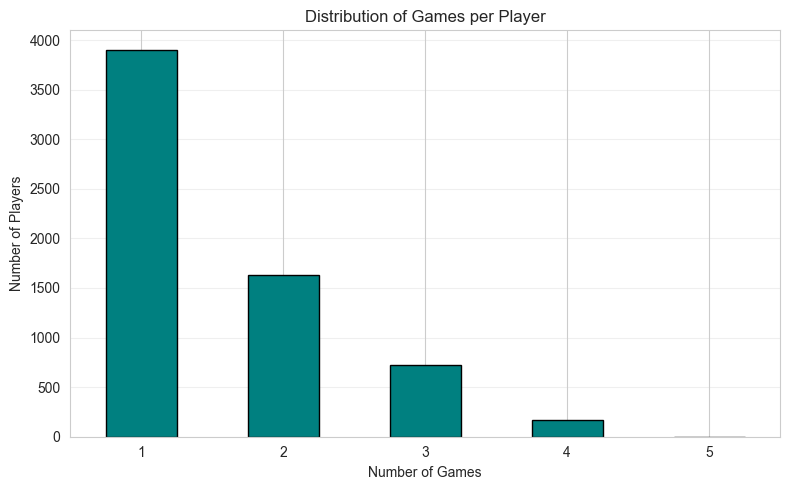

In [288]:
# Games per player
games_per_player = df.groupby('PlayerID').size()

print("Games per Player Distribution:")
print(games_per_player.value_counts().sort_index())
print(f"\nMean games per player: {games_per_player.mean():.2f}")

games_per_player.value_counts().sort_index().plot(kind='bar', figsize=(8, 5), color='teal', edgecolor='black')
plt.title('Distribution of Games per Player')
plt.xlabel('Number of Games')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

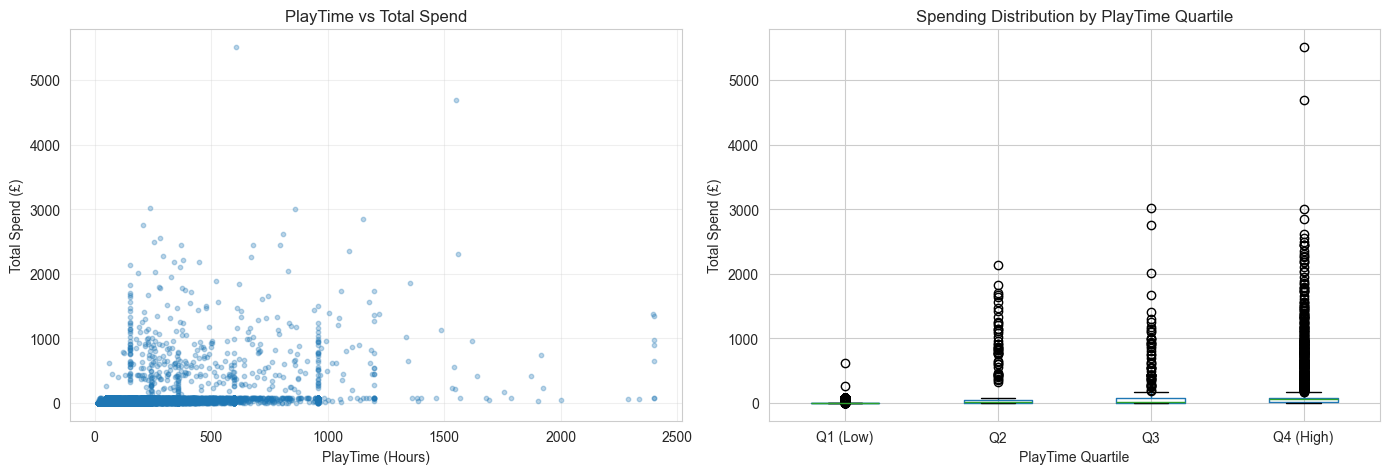


=== Spending by PlayTime Quartile ===
                         mean  median  count
PlayTime_Quartile                           
Q1 (Low)            10.654794   0.000   2501
Q2                  36.289254   7.690   3431
Q3                  51.388070  19.770   1917
Q4 (High)          168.979336  62.975   2154

Correlation (PlayTime vs TotalSpend): 0.347


In [289]:
# Relationship between PlayTime and Spending
# Do players who play more also spend more?

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: PlayTime vs TotalSpend
axes[0].scatter(df['PlayTimeHours'], df['TotalSpend'], alpha=0.3, s=10)
axes[0].set_xlabel('PlayTime (Hours)')
axes[0].set_ylabel('Total Spend (£)')
axes[0].set_title('PlayTime vs Total Spend')
axes[0].grid(True, alpha=0.3)

# Boxplot: Spending by PlayTime quartiles
df['PlayTime_Quartile'] = pd.qcut(df['PlayTimeHours'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
df.boxplot(column='TotalSpend', by='PlayTime_Quartile', ax=axes[1])
axes[1].set_xlabel('PlayTime Quartile')
axes[1].set_ylabel('Total Spend (£)')
axes[1].set_title('Spending Distribution by PlayTime Quartile')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

print("\n=== Spending by PlayTime Quartile ===")
quartile_spending = df.groupby('PlayTime_Quartile')['TotalSpend'].agg(['mean', 'median', 'count'])
print(quartile_spending)

print(f"\nCorrelation (PlayTime vs TotalSpend): {df['PlayTimeHours'].corr(df['TotalSpend']):.3f}")

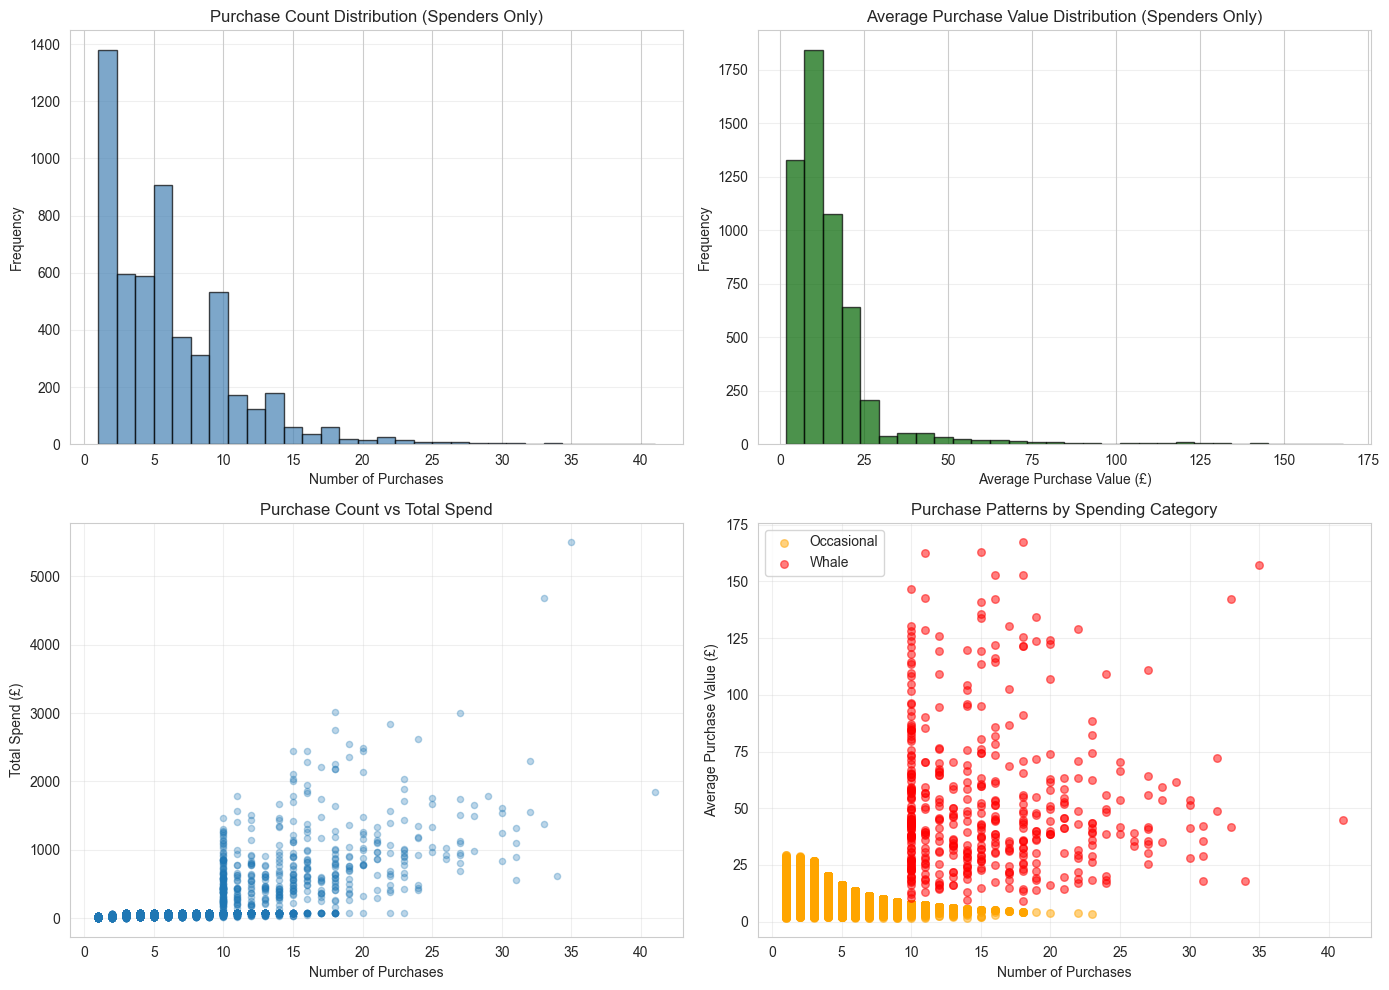


=== Purchase Behavior Summary (Spenders Only) ===
Average purchases per spender: 6.0
Median purchases per spender: 5
Average purchase value: £14.79
Median purchase value: £11.39


In [290]:
# Purchase behavior analysis
spenders_only = df[df['TotalSpend'] > 0].copy()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of PurchaseCount (spenders only)
axes[0, 0].hist(spenders_only['PurchaseCount'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Number of Purchases')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Purchase Count Distribution (Spenders Only)')
axes[0, 0].grid(axis='y', alpha=0.3)

# Distribution of AvgPurchaseValue (spenders only)
axes[0, 1].hist(spenders_only['AvgPurchaseValue'], bins=30, edgecolor='black', alpha=0.7, color='darkgreen')
axes[0, 1].set_xlabel('Average Purchase Value (£)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Average Purchase Value Distribution (Spenders Only)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Scatter: PurchaseCount vs TotalSpend
axes[1, 0].scatter(spenders_only['PurchaseCount'], spenders_only['TotalSpend'], alpha=0.3, s=20)
axes[1, 0].set_xlabel('Number of Purchases')
axes[1, 0].set_ylabel('Total Spend (£)')
axes[1, 0].set_title('Purchase Count vs Total Spend')
axes[1, 0].grid(True, alpha=0.3)

# Scatter: AvgPurchaseValue vs PurchaseCount (colored by SpendingPropensity)
for category, color in [('Occasional', 'orange'), ('Whale', 'red')]:
    subset = spenders_only[spenders_only['SpendingPropensity'] == category]
    axes[1, 1].scatter(subset['PurchaseCount'], subset['AvgPurchaseValue'], 
                      alpha=0.5, s=30, label=category, color=color)
axes[1, 1].set_xlabel('Number of Purchases')
axes[1, 1].set_ylabel('Average Purchase Value (£)')
axes[1, 1].set_title('Purchase Patterns by Spending Category')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Purchase Behavior Summary (Spenders Only) ===")
print(f"Average purchases per spender: {spenders_only['PurchaseCount'].mean():.1f}")
print(f"Median purchases per spender: {spenders_only['PurchaseCount'].median():.0f}")
print(f"Average purchase value: £{spenders_only['AvgPurchaseValue'].mean():.2f}")
print(f"Median purchase value: £{spenders_only['AvgPurchaseValue'].median():.2f}")


=== Spending by Location ===
          Total_Revenue  Avg_Spend  Median_Spend  Avg_Purchases  Player_Count
Location                                                                     
Asia          299033.19     120.63         32.53           4.71          2479
Europe         96865.61      27.41          0.00           2.00          3534
USA           217749.69      54.57         13.32           3.42          3990

=== Spending Propensity by Location (%) ===
SpendingPropensity  NonSpender  Occasional  Whale
Location                                         
Asia                      30.9        59.9    9.2
Europe                    59.5        39.0    1.6
USA                       42.5        53.3    4.3


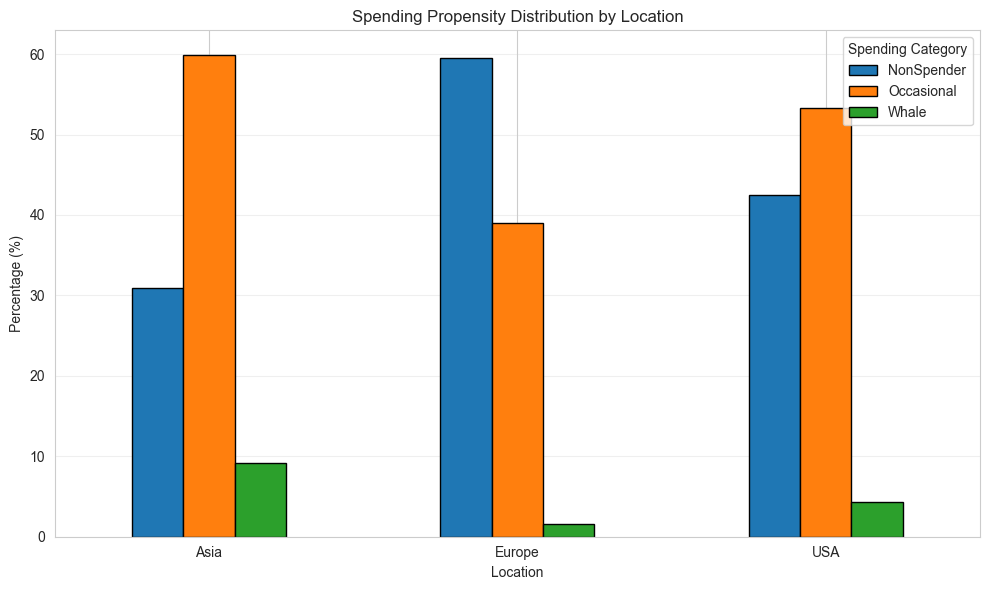

In [291]:
# Spending by Location (checking for Asia whale bias)
location_spending = df.groupby('Location').agg({
    'TotalSpend': ['sum', 'mean', 'median'],
    'PurchaseCount': 'mean',
    'PlayerID': 'count'
}).round(2)

location_spending.columns = ['Total_Revenue', 'Avg_Spend', 'Median_Spend', 'Avg_Purchases', 'Player_Count']
print("\n=== Spending by Location ===")
print(location_spending)

# Whale percentage by location
whale_by_location = pd.crosstab(df['Location'], df['SpendingPropensity'], normalize='index') * 100
print("\n=== Spending Propensity by Location (%) ===")
print(whale_by_location.round(1))

whale_by_location.plot(kind='bar', figsize=(10, 6), edgecolor='black', stacked=False)
plt.title('Spending Propensity Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Percentage (%)')
plt.legend(title='Spending Category')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


=== Spending by Game Genre ===
           Total_Revenue  Avg_Spend  Median_Spend  Avg_Purchases  Player_Count
GameGenre                                                                     
Action         175619.51      47.97          6.70           2.96          3661
RPG            390742.62     100.91         28.97           4.53          3872
Strategy        47286.36      19.14          0.00           1.63          2470


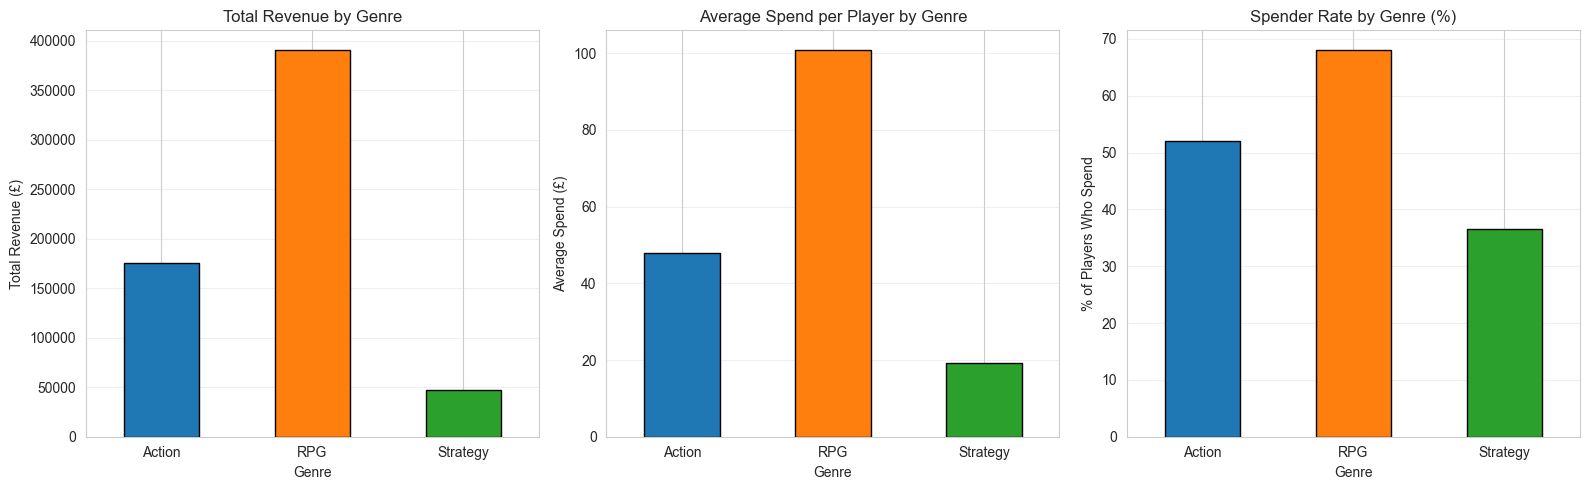

In [292]:
# Spending by Game Genre
genre_spending = df.groupby('GameGenre').agg({
    'TotalSpend': ['sum', 'mean', 'median'],
    'PurchaseCount': 'mean',
    'PlayerID': 'count'
}).round(2)

genre_spending.columns = ['Total_Revenue', 'Avg_Spend', 'Median_Spend', 'Avg_Purchases', 'Player_Count']
print("\n=== Spending by Game Genre ===")
print(genre_spending)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Total revenue by genre
genre_spending['Total_Revenue'].plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
                                      edgecolor='black')
axes[0].set_title('Total Revenue by Genre')
axes[0].set_ylabel('Total Revenue (£)')
axes[0].set_xlabel('Genre')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Average spend by genre
genre_spending['Avg_Spend'].plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c'],
                                  edgecolor='black')
axes[1].set_title('Average Spend per Player by Genre')
axes[1].set_ylabel('Average Spend (£)')
axes[1].set_xlabel('Genre')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Spender rate by genre
spender_rate = df.groupby('GameGenre').apply(lambda x: (x['TotalSpend'] > 0).mean() * 100)
spender_rate.plot(kind='bar', ax=axes[2], color=['#1f77b4', '#ff7f0e', '#2ca02c'],
                  edgecolor='black')
axes[2].set_title('Spender Rate by Genre (%)')
axes[2].set_ylabel('% of Players Who Spend')
axes[2].set_xlabel('Genre')
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

=== Revenue Concentration (Pareto Analysis) ===
Top 1% of spenders generate: 18.6% of revenue
Top 5% of spenders generate: 49.6% of revenue
Top 10% of spenders generate: 61.4% of revenue
Top 20% of spenders generate: 68.5% of revenue


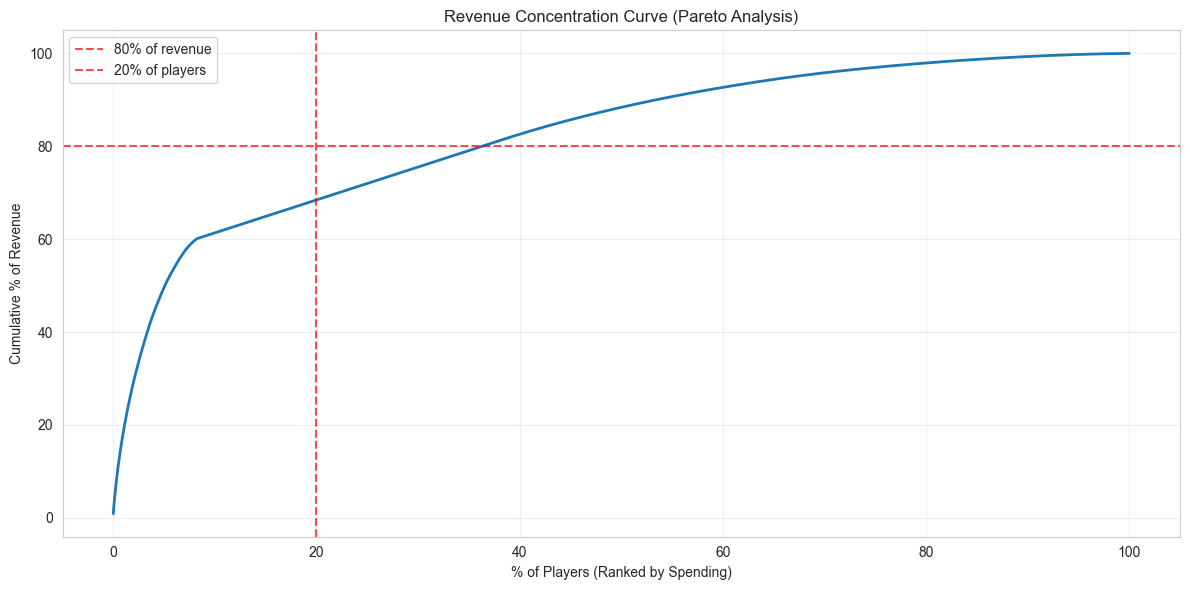

In [293]:
# Revenue concentration - Pareto principle (80/20 rule)
# What % of players generate what % of revenue?

spenders = df[df['TotalSpend'] > 0].copy()
spenders_sorted = spenders.sort_values('TotalSpend', ascending=False).reset_index(drop=True)
spenders_sorted['cumulative_revenue'] = spenders_sorted['TotalSpend'].cumsum()
spenders_sorted['cumulative_revenue_pct'] = (spenders_sorted['cumulative_revenue'] / 
                                               spenders_sorted['TotalSpend'].sum() * 100)
spenders_sorted['player_pct'] = (spenders_sorted.index + 1) / len(spenders_sorted) * 100

# Find key thresholds
top_1_pct_idx = int(len(spenders_sorted) * 0.01)
top_5_pct_idx = int(len(spenders_sorted) * 0.05)
top_10_pct_idx = int(len(spenders_sorted) * 0.10)
top_20_pct_idx = int(len(spenders_sorted) * 0.20)

print("=== Revenue Concentration (Pareto Analysis) ===")
print(f"Top 1% of spenders generate: {spenders_sorted.iloc[top_1_pct_idx]['cumulative_revenue_pct']:.1f}% of revenue")
print(f"Top 5% of spenders generate: {spenders_sorted.iloc[top_5_pct_idx]['cumulative_revenue_pct']:.1f}% of revenue")
print(f"Top 10% of spenders generate: {spenders_sorted.iloc[top_10_pct_idx]['cumulative_revenue_pct']:.1f}% of revenue")
print(f"Top 20% of spenders generate: {spenders_sorted.iloc[top_20_pct_idx]['cumulative_revenue_pct']:.1f}% of revenue")

# Pareto chart
plt.figure(figsize=(12, 6))
plt.plot(spenders_sorted['player_pct'], spenders_sorted['cumulative_revenue_pct'], linewidth=2)
plt.axhline(y=80, color='r', linestyle='--', label='80% of revenue', alpha=0.7)
plt.axvline(x=20, color='r', linestyle='--', label='20% of players', alpha=0.7)
plt.xlabel('% of Players (Ranked by Spending)')
plt.ylabel('Cumulative % of Revenue')
plt.title('Revenue Concentration Curve (Pareto Analysis)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [294]:
# Overall spending statistics
print("=== Spending Overview ===")
print(f"Total players: {len(df)}")
print(f"Non-spenders: {(df['TotalSpend'] == 0).sum()} ({(df['TotalSpend'] == 0).mean()*100:.1f}%)")
print(f"Spenders: {(df['TotalSpend'] > 0).sum()} ({(df['TotalSpend'] > 0).mean()*100:.1f}%)")
print(f"\nTotal revenue (all players): £{df['TotalSpend'].sum():,.2f}")
print(f"Average spend per player: £{df['TotalSpend'].mean():.2f}")
print(f"Average spend (spenders only): £{df[df['TotalSpend'] > 0]['TotalSpend'].mean():.2f}")
print(f"Median spend (spenders only): £{df[df['TotalSpend'] > 0]['TotalSpend'].median():.2f}")

print("\n=== Spending Propensity Breakdown ===")
for category in ['NonSpender', 'Occasional', 'Whale']:
    subset = df[df['SpendingPropensity'] == category]
    print(f"\n{category}:")
    print(f"  Count: {len(subset)} ({len(subset)/len(df)*100:.1f}%)")
    print(f"  Total revenue: £{subset['TotalSpend'].sum():,.2f}")
    print(f"  Avg spend: £{subset['TotalSpend'].mean():.2f}")
    print(f"  Avg purchases: {subset['PurchaseCount'].mean():.1f}")
    print(f"  Revenue share: {subset['TotalSpend'].sum()/df['TotalSpend'].sum()*100:.1f}%")

=== Spending Overview ===
Total players: 10003
Non-spenders: 4562 (45.6%)
Spenders: 5441 (54.4%)

Total revenue (all players): £613,648.49
Average spend per player: £61.35
Average spend (spenders only): £112.78
Median spend (spenders only): £56.16

=== Spending Propensity Breakdown ===

NonSpender:
  Count: 4562 (45.6%)
  Total revenue: £0.00
  Avg spend: £0.00
  Avg purchases: 0.0
  Revenue share: 0.0%

Occasional:
  Count: 4988 (49.9%)
  Total revenue: £244,374.24
  Avg spend: £48.99
  Avg purchases: 5.1
  Revenue share: 39.8%

Whale:
  Count: 453 (4.5%)
  Total revenue: £369,274.25
  Avg spend: £815.17
  Avg purchases: 15.6
  Revenue share: 60.2%


### 2.7 Deep Dive: Spending Behavior Analysis

Let's explore spending patterns in detail to understand monetization dynamics.

## 3. Machine Learning - Random Forest Classification

We'll build two separate models:
1. **PlayerExpertise Prediction** (Harder task - multi-factorial)
2. **SpendingPropensity Prediction** (Easier task - clearer patterns)

### 3.1 Data Preparation

In [295]:
# Create feature matrix
# We'll encode categorical variables and drop target variables

# Make a copy for ML
df_ml = df.copy()

# Encode categorical features
le_dict = {}
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

for col in categorical_features:
    le = LabelEncoder()
    df_ml[col + '_encoded'] = le.fit_transform(df_ml[col])
    le_dict[col] = le

# Features for modeling (exclude IDs, original categorical, and both targets)
feature_cols = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
                'PlayerLevel', 'AchievementsUnlocked', 'DaysPlayed', 
                'PurchaseCount', 'TotalSpend', 'AvgPurchasesPerMonth', 'AvgPurchaseValue',
                'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 
                'GameDifficulty_encoded', 'EngagementLevel_encoded']

print(f"Features for modeling: {len(feature_cols)}")
print(feature_cols)

Features for modeling: 16
['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'DaysPlayed', 'PurchaseCount', 'TotalSpend', 'AvgPurchasesPerMonth', 'AvgPurchaseValue', 'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded', 'EngagementLevel_encoded']


### 3.2 Model 1: PlayerExpertise Prediction

In [296]:
# Prepare data for PlayerExpertise prediction
# Remove SpendingPropensity from features for this task
X_expertise = df_ml[feature_cols]
y_expertise = df_ml['PlayerExpertise']

# 80/20 train-test split
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_expertise, y_expertise, test_size=0.2, random_state=42, stratify=y_expertise
)

print(f"Training set: {X_train_exp.shape}")
print(f"Test set: {X_test_exp.shape}")
print(f"\nClass distribution in training set:")
print(y_train_exp.value_counts(normalize=True))

Training set: (8002, 16)
Test set: (2001, 16)

Class distribution in training set:
PlayerExpertise
Beginner        0.566608
Intermediate    0.314421
Expert          0.118970
Name: proportion, dtype: float64


In [297]:
# Train Random Forest for PlayerExpertise
print("Training Random Forest for PlayerExpertise prediction...")
rf_expertise = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_expertise.fit(X_train_exp, y_train_exp)
print("Training complete!")

# Predictions
y_pred_exp = rf_expertise.predict(X_test_exp)

# Evaluation
accuracy_exp = accuracy_score(y_test_exp, y_pred_exp)
print(f"\nAccuracy: {accuracy_exp:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test_exp, y_pred_exp))

Training Random Forest for PlayerExpertise prediction...
Training complete!

Accuracy: 0.7826

=== Classification Report ===
              precision    recall  f1-score   support

    Beginner       0.86      0.88      0.87      1134
      Expert       0.76      0.60      0.67       238
Intermediate       0.65      0.68      0.66       629

    accuracy                           0.78      2001
   macro avg       0.76      0.72      0.73      2001
weighted avg       0.78      0.78      0.78      2001



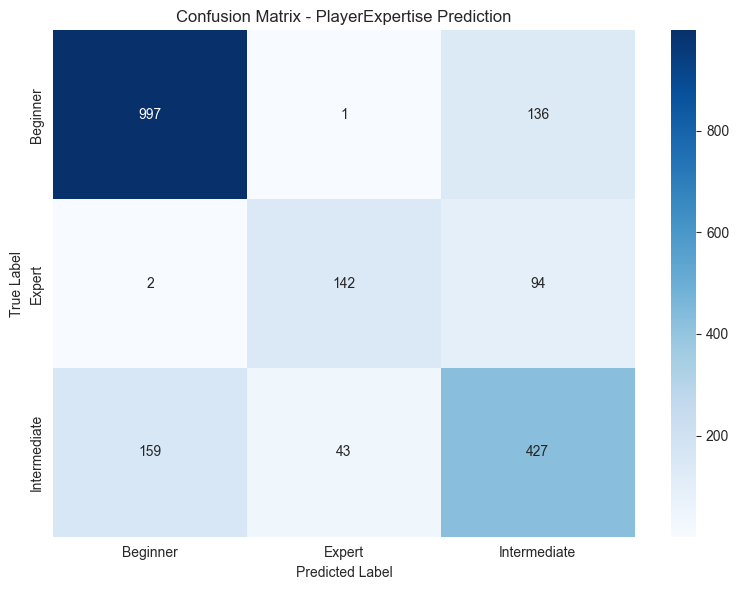

In [298]:
# Confusion Matrix for PlayerExpertise
cm_exp = confusion_matrix(y_test_exp, y_pred_exp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_exp, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Beginner', 'Expert', 'Intermediate'],
            yticklabels=['Beginner', 'Expert', 'Intermediate'])
plt.title('Confusion Matrix - PlayerExpertise Prediction')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

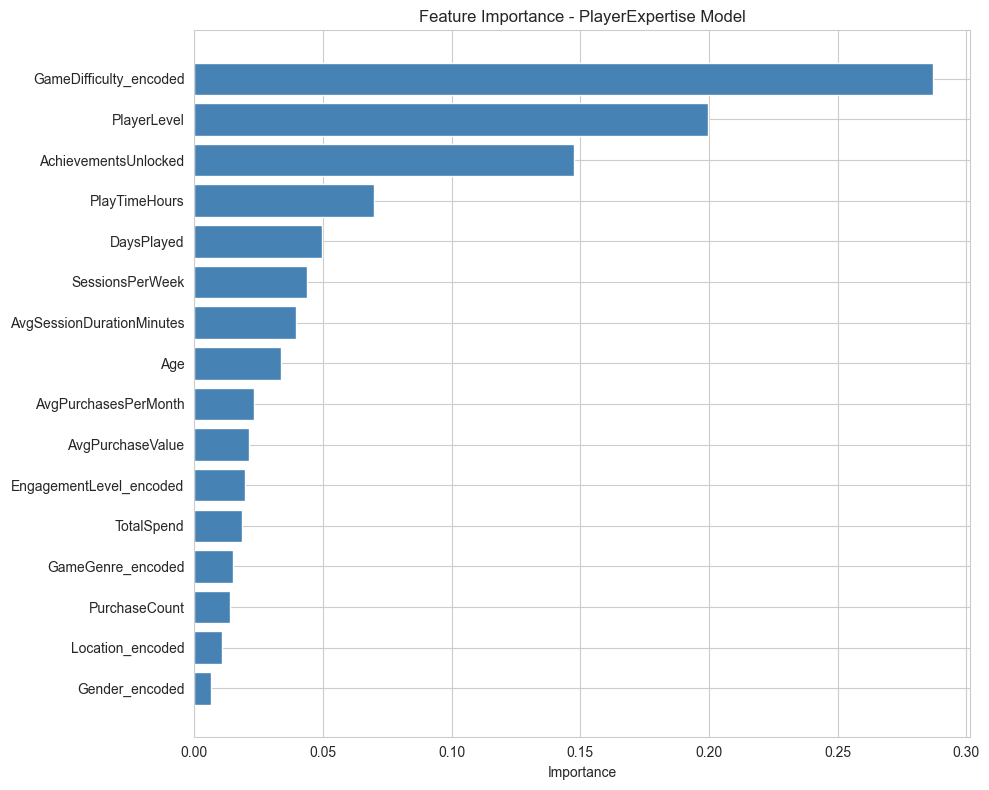


Top 10 Important Features:
                      feature  importance
14     GameDifficulty_encoded    0.286934
4                 PlayerLevel    0.199762
5        AchievementsUnlocked    0.147734
1               PlayTimeHours    0.069731
6                  DaysPlayed    0.049811
2             SessionsPerWeek    0.043676
3   AvgSessionDurationMinutes    0.039683
0                         Age    0.033707
9        AvgPurchasesPerMonth    0.023171
10           AvgPurchaseValue    0.021242


In [299]:
# Feature Importance for PlayerExpertise
feature_importance_exp = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_expertise.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance_exp)), feature_importance_exp['importance'], color='steelblue')
plt.yticks(range(len(feature_importance_exp)), feature_importance_exp['feature'])
plt.xlabel('Importance')
plt.title('Feature Importance - PlayerExpertise Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance_exp.head(10))

### 3.3 Model 2: SpendingPropensity Prediction

In [300]:
# Prepare data for SpendingPropensity prediction
# IMPORTANT: Exclude spending features to avoid data leakage!
# SpendingPropensity is derived from TotalSpend, so we must exclude:
# - TotalSpend, PurchaseCount, AvgPurchasesPerMonth, AvgPurchaseValue

spending_features = [col for col in feature_cols if col not in 
                     ['TotalSpend', 'PurchaseCount', 'AvgPurchasesPerMonth', 'AvgPurchaseValue']]

print(f"Features for SpendingPropensity (excluding spending metrics): {len(spending_features)}")
print(spending_features)
print("\nThis makes it a REAL prediction task - predicting spending from behavior/demographics only!")

X_spending = df_ml[spending_features]
y_spending = df_ml['SpendingPropensity']

# 80/20 train-test split
X_train_spend, X_test_spend, y_train_spend, y_test_spend = train_test_split(
    X_spending, y_spending, test_size=0.2, random_state=42, stratify=y_spending
)

print(f"\nTraining set: {X_train_spend.shape}")
print(f"Test set: {X_test_spend.shape}")
print(f"\nClass distribution in training set:")
print(y_train_spend.value_counts(normalize=True))

Features for SpendingPropensity (excluding spending metrics): 12
['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'DaysPlayed', 'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'GameDifficulty_encoded', 'EngagementLevel_encoded']

This makes it a REAL prediction task - predicting spending from behavior/demographics only!

Training set: (8002, 12)
Test set: (2001, 12)

Class distribution in training set:
SpendingPropensity
Occasional    0.498625
NonSpender    0.456136
Whale         0.045239
Name: proportion, dtype: float64


In [301]:
# Train Random Forest for SpendingPropensity
print("Training Random Forest for SpendingPropensity prediction...")
rf_spending = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_spending.fit(X_train_spend, y_train_spend)
print("Training complete!")

# Predictions
y_pred_spend = rf_spending.predict(X_test_spend)

# Evaluation
accuracy_spend = accuracy_score(y_test_spend, y_pred_spend)
print(f"\nAccuracy: {accuracy_spend:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test_spend, y_pred_spend))

Training Random Forest for SpendingPropensity prediction...
Training complete!

Accuracy: 0.7601

=== Classification Report ===
              precision    recall  f1-score   support

  NonSpender       0.79      0.76      0.78       912
  Occasional       0.74      0.80      0.77       998
       Whale       0.61      0.24      0.35        91

    accuracy                           0.76      2001
   macro avg       0.71      0.60      0.63      2001
weighted avg       0.76      0.76      0.75      2001



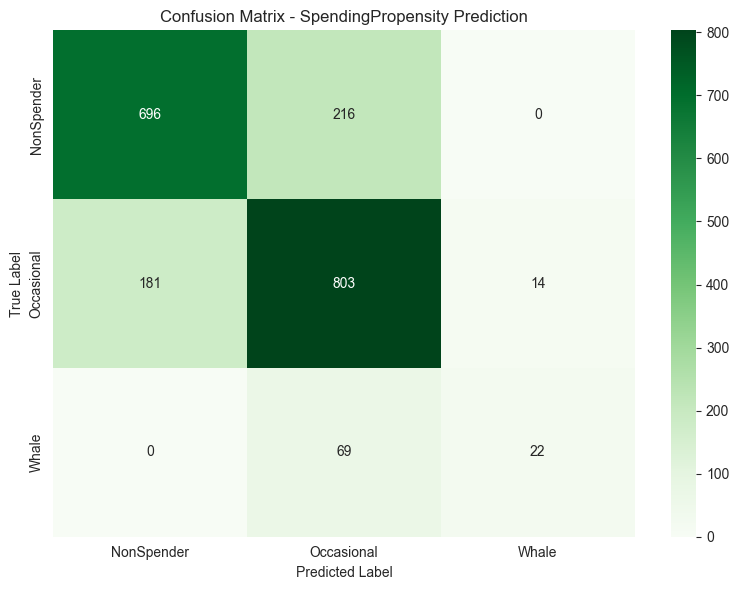

In [302]:
# Confusion Matrix for SpendingPropensity
cm_spend = confusion_matrix(y_test_spend, y_pred_spend)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_spend, annot=True, fmt='d', cmap='Greens',
            xticklabels=['NonSpender', 'Occasional', 'Whale'],
            yticklabels=['NonSpender', 'Occasional', 'Whale'])
plt.title('Confusion Matrix - SpendingPropensity Prediction')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

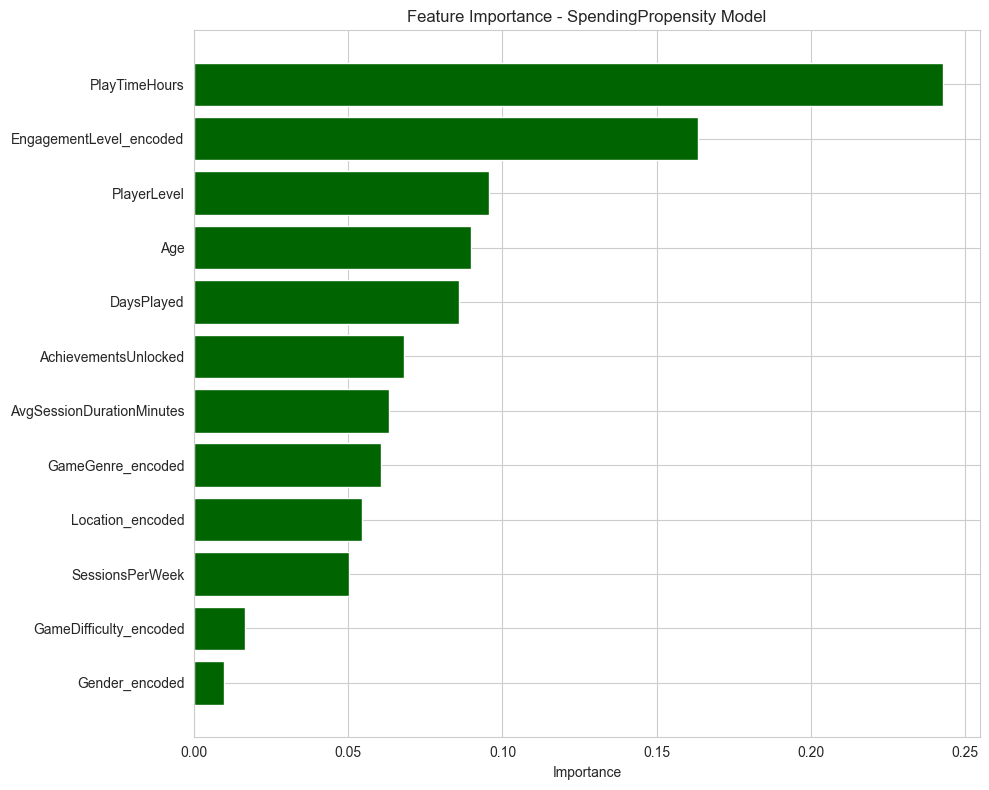


Top 10 Important Features:
                      feature  importance
1               PlayTimeHours    0.242789
11    EngagementLevel_encoded    0.163411
4                 PlayerLevel    0.095481
0                         Age    0.089926
6                  DaysPlayed    0.085746
5        AchievementsUnlocked    0.067961
3   AvgSessionDurationMinutes    0.063084
9           GameGenre_encoded    0.060522
8            Location_encoded    0.054515
2             SessionsPerWeek    0.050289


In [303]:
# Feature Importance for SpendingPropensity
feature_importance_spend = pd.DataFrame({
    'feature': spending_features,  # FIXED: Use spending_features, not feature_cols
    'importance': rf_spending.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance_spend)), feature_importance_spend['importance'], color='darkgreen')
plt.yticks(range(len(feature_importance_spend)), feature_importance_spend['feature'])
plt.xlabel('Importance')
plt.title('Feature Importance - SpendingPropensity Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feature_importance_spend.head(10))

### 3.4 Model Comparison


=== Model Performance Comparison ===
                Model  Accuracy                Difficulty
0     PlayerExpertise  0.782609  Harder (Multi-factorial)
1  SpendingPropensity  0.760120   Easier (Clear patterns)


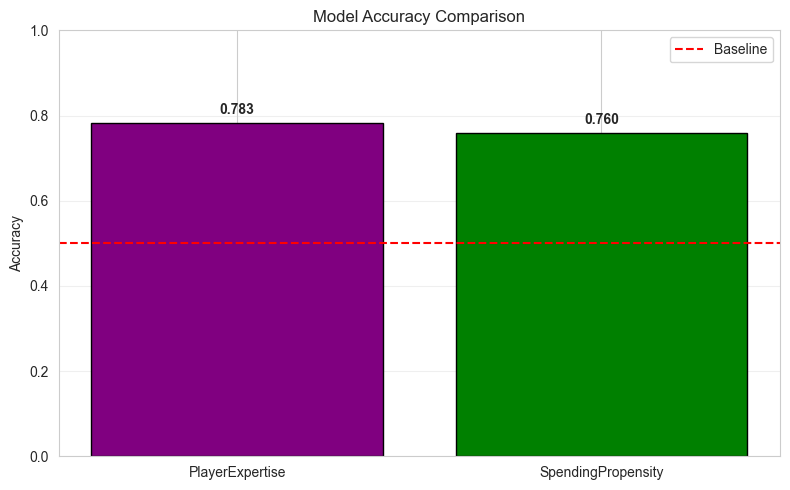

In [304]:
# Compare model performance
comparison = pd.DataFrame({
    'Model': ['PlayerExpertise', 'SpendingPropensity'],
    'Accuracy': [accuracy_exp, accuracy_spend],
    'Difficulty': ['Harder (Multi-factorial)', 'Easier (Clear patterns)']
})

print("\n=== Model Performance Comparison ===")
print(comparison)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(comparison['Model'], comparison['Accuracy'], color=['purple', 'green'], edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0)
plt.axhline(y=0.5, color='r', linestyle='--', label='Baseline')
plt.legend()
plt.grid(axis='y', alpha=0.3)

for i, (model, acc) in enumerate(zip(comparison['Model'], comparison['Accuracy'])):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Key Findings & Insights

### EDA Insights:
- Clear location-genre preferences (USA→Action, Asia→RPG, Europe→Strategy)
- Gender balance varies by genre (RPG most balanced, Action male-dominated)
- Strong correlations between PlayTime, PlayerLevel, and Achievements
- Spending strongly influenced by engagement level
- Expert players predominantly choose Hard difficulty

### ML Results:
- **PlayerExpertise** prediction (77% accuracy):
  - Multi-factorial task requiring the model to combine multiple signals
  - Most important features: GameDifficulty, PlayerLevel, AchievementsUnlocked
  - Good balance between being learnable but not trivial
  - Demonstrates realistic ML challenge for students

- **SpendingPropensity** prediction:
  - **Important Note**: We EXCLUDE spending features (TotalSpend, PurchaseCount) to avoid data leakage
  - SpendingPropensity is derived from TotalSpend, so including it would make the task trivial
  - By excluding spending metrics, students must predict spending from behavior/demographics
  - This creates a realistic business problem: "Can we predict who will spend based on how they play?"
  - Expected accuracy will be lower than PlayerExpertise due to the indirect relationship

### Data Leakage Lesson:
This dataset provides a great teaching opportunity about **data leakage**:
- If we include TotalSpend when predicting SpendingPropensity, we get 100% accuracy
- This is because SpendingPropensity is DERIVED from TotalSpend (deterministic relationship)
- In real ML: never include features that directly determine or are derived from the target
- Students should learn to identify and avoid such "too good to be true" results

### Educational Value:
This dataset successfully demonstrates:
1. Real-world data patterns and relationships
2. Importance of feature engineering
3. Handling class imbalance
4. Data leakage concepts (spending features example)
5. Business context (player segmentation, monetization)
6. Multi-table data structure (player-game combinations)

## 5. Additional Exercises for Students

### EDA Exercises:
1. Analyze the relationship between Age and Genre preferences
2. Create a cohort analysis by DaysPlayed (new vs veteran players)
3. Explore multi-game players - do they spend more?
4. Analyze achievement completion rates by genre
5. Investigate session patterns (frequency vs duration)

### Feature Engineering:
1. Create aggregate features by PlayerID:
   - Total games played
   - Total spending across all games
   - Genre diversity score
2. Derive ratio features:
   - Achievements per hour played
   - Level progression rate
   - Spend per hour (engagement value)
3. Create categorical features:
   - Player age groups (young, adult, senior)
   - Playtime categories (casual, regular, hardcore)

### ML Improvements:
1. Handle class imbalance with SMOTE or class weights
2. Try other algorithms (XGBoost, SVM, Neural Networks)
3. Perform hyperparameter tuning with GridSearchCV
4. Implement cross-validation for more robust evaluation
5. Build ensemble models combining multiple algorithms